# News headlines - Classification and Sentiment Analysis

## Classification

In [28]:
import os
import nltk
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np

In [41]:
# Setting path for bbc data
bbc_path = 'bbc/'
categories = os.listdir(bbc_path)

In [54]:
# News headlines from NDTV
news = ['Boris Johnson Announces Full Lockdown In England Amid Rising Covid Cases',
       "'Don't Accuse Us Of Inexperience, We Are Global Company': Bharat Biotech",
       "Saudi Arabia Lifts Blockade Of Qatar, Easing Years-Long Feud",
       "'Minister Said Won't Repeal Law, Go To Supreme Court': Farmers After Meet",
       "'New Year, New Opportunities': US Welcomes India At UN Security Council"]

In [57]:
# Extracting data from the text files and lemmatizing it
wnl = WordNetLemmatizer()
X = np.array([])
y = []
for category in categories:
    files = os.listdir(bbc_path+category+'/')
    for file in files:
        f = open(bbc_path+category+'/'+file,'r')
        data = f.read().replace('\n',' ').lower()
        data = ' '.join([wnl.lemmatize(words) for words in nltk.word_tokenize(data)])
        X = np.append(X,data)
        y.append(category)

In [58]:
# Converting data to pandas series
X = pd.Series(X)

In [45]:
# Instantiating tokenizer
from nltk import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()

In [46]:
# Instantiating model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [47]:
# Instantiating Tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [48]:
# Setting tfidf vectorizer parameters
tfidf.set_params(tokenizer=tokenizer.tokenize)
tfidf.set_params(stop_words='english')
tfidf.set_params(ngram_range=(1,2))
tfidf.set_params(max_df=0.5)
tfidf.set_params(min_df=2)

TfidfVectorizer(max_df=0.5, min_df=2, ngram_range=(1, 2), stop_words='english',
                tokenizer=<bound method TreebankWordTokenizer.tokenize of <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x000001AA945F2EC8>>)

In [49]:
# Transforming data
X_transformed = tfidf.fit_transform(X)
news_transformed = tfidf.transform(news)

In [50]:
# Training the model
nb.fit(X_transformed,y)

MultinomialNB()

In [51]:
# Making predictions
pred = nb.predict(news_transformed)

In [56]:
# Printing predictions
for i in range(len(news)):
    print(news[i]+" => "+pred[i])

Boris Johnson Announces Full Lockdown In England Amid Rising Covid Cases => sport
'Don't Accuse Us Of Inexperience, We Are Global Company': Bharat Biotech => business
Saudi Arabia Lifts Blockade Of Qatar, Easing Years-Long Feud => business
'Minister Said Won't Repeal Law, Go To Supreme Court': Farmers After Meet => politics
'New Year, New Opportunities': US Welcomes India At UN Security Council => business


## Sentiment Analysis

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# Sentiment analysis of 25 news items
documents = X[:25]
sentiments = []
for doc in documents:
    sentence = TextBlob(doc)
    sentiment = sentence.sentiment
    if sentiment.polarity > 0:
        sentiments.append("Positive statement")
    elif sentiment.polarity < 0:
        sentiments.append("Negative statement")
    else:
        sentiments.append("Neutral statement")

Text(0.5, 1.0, 'News Sentiment')

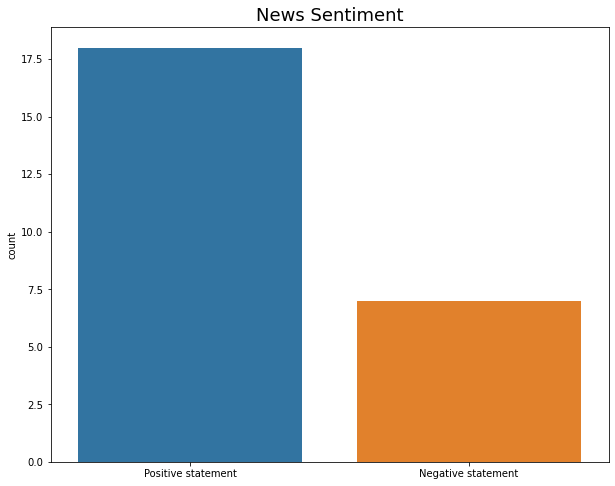

In [82]:
# Bar plot of positive, negative and neutral news
plt.figure(figsize=(10,8))
sns.countplot(sentiments)
plt.title("News Sentiment",fontsize=18)